# Code to generate figure 2 part 2 for freeze events for the paper

In [1]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

In [6]:
# setup the templates to load in the data

# Forecast Examples
cira_freeze_forecast_FOURv2 = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping={
        "t2": "surface_air_temperature",
    },
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_freeze_forecast_GC = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping={
        "t2": "surface_air_temperature",
    },
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_freeze_forecast_PANG = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping={
        "t2": "surface_air_temperature",
    },
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)


hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
)


FOURv2_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_freeze_forecast_FOURv2, 
    ),
]

FOURv2_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_freeze_forecast_FOURv2, 
    ),
]

GC_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_freeze_forecast_GC, 
    ),
]

GC_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_freeze_forecast_GC, 
    ),
]

PANG_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_freeze_forecast_PANG, 
    ),
]

PANG_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_freeze_forecast_PANG, 
    ),
]

HRES_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
]

HRES_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]


In [7]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()
freeze_test = {"cases": case_dict["cases"]}

ewb_fourv2_ghcn = evaluate.ExtremeWeatherBench(freeze_test, FOURv2_GHCN_EVALUATION_OBJECTS)
ewb_fourv2_era5 = evaluate.ExtremeWeatherBench(freeze_test, FOURv2_ERA5_EVALUATION_OBJECTS)

ewb_gc_ghcn = evaluate.ExtremeWeatherBench(freeze_test, GC_GHCN_EVALUATION_OBJECTS)
ewb_gc_era5 = evaluate.ExtremeWeatherBench(freeze_test, GC_ERA5_EVALUATION_OBJECTS)

ewb_pang_ghcn = evaluate.ExtremeWeatherBench(freeze_test, PANG_GHCN_EVALUATION_OBJECTS)
ewb_pang_era5 = evaluate.ExtremeWeatherBench(freeze_test, PANG_ERA5_EVALUATION_OBJECTS)

ewb_hres_ghcn = evaluate.ExtremeWeatherBench(freeze_test, HRES_GHCN_EVALUATION_OBJECTS)
ewb_hres_era5 = evaluate.ExtremeWeatherBench(freeze_test, HRES_ERA5_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


In [8]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box so I commented most of them out here and copied them below
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_ghcn_results = ewb_fourv2_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
fourv2_era5_results = ewb_fourv2_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# gc_ghcn_results = ewb_gc_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# gc_era5_results = ewb_gc_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# pang_ghcn_results = ewb_pang_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# pang_era5_results = ewb_pang_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# hres_ghcn_results = ewb_hres_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# hres_era5_results = ewb_hres_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/14 [00:00<?, ?it/s]

Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}


  0%|          | 0/14 [00:00<?, ?it/s]

Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}


In [9]:
gc_ghcn_results = ewb_gc_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
gc_era5_results = ewb_gc_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/14 [00:00<?, ?it/s]

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [10]:
pang_ghcn_results = ewb_pang_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_era5_results = ewb_pang_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/14 [00:00<?, ?it/s]

forecast dataset for case 91 has zero-length dimensions ['valid_time'] for case time range 2021-03-04 18:00:00 to 2021-03-10 18:00:00
forecast dataset for case 30 has zero-length dimensions ['valid_time'] for case time range 2021-02-10 12:00:00 to 2021-02-22 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expe

  0%|          | 0/14 [00:00<?, ?it/s]

forecast dataset for case 91 has zero-length dimensions ['valid_time'] for case time range 2021-03-04 18:00:00 to 2021-03-10 18:00:00
forecast dataset for case 30 has zero-length dimensions ['valid_time'] for case time range 2021-02-10 12:00:00 to 2021-02-22 00:00:00
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expected columns: {'lead_time'}
Missing expe

In [11]:
hres_ghcn_results = ewb_hres_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_era5_results = ewb_hres_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/14 [00:00<?, ?it/s]

forecast dataset for case 32 has zero-length dimensions ['valid_time'] for case time range 2023-12-02 06:00:00 to 2023-12-08 06:00:00
forecast dataset for case 33 has zero-length dimensions ['valid_time'] for case time range 2023-12-15 06:00:00 to 2023-12-26 18:00:00
forecast dataset for case 89 has zero-length dimensions ['valid_time'] for case time range 2024-01-11 12:00:00 to 2024-01-20 00:00:00
forecast dataset for case 92 has zero-length dimensions ['valid_time'] for case time range 2024-01-01 06:00:00 to 2024-01-09 12:00:00
forecast dataset for case 95 has zero-length dimensions ['valid_time'] for case time range 2024-01-20 00:00:00 to 2024-02-04 18:00:00
forecast dataset for case 94 has zero-length dimensions ['valid_time'] for case time range 2024-04-16 12:00:00 to 2024-04-27 12:00:00
forecast dataset for case 96 has zero-length dimensions ['valid_time'] for case time range 2024-04-02 00:00:00 to 2024-04-08 00:00:00
Missing expected columns: {'lead_time'}
Missing expected colum

  0%|          | 0/14 [00:00<?, ?it/s]

forecast dataset for case 95 has zero-length dimensions ['valid_time'] for case time range 2024-01-20 00:00:00 to 2024-02-04 18:00:00
forecast dataset for case 32 has zero-length dimensions ['valid_time'] for case time range 2023-12-02 06:00:00 to 2023-12-08 06:00:00
forecast dataset for case 92 has zero-length dimensions ['valid_time'] for case time range 2024-01-01 06:00:00 to 2024-01-09 12:00:00
forecast dataset for case 96 has zero-length dimensions ['valid_time'] for case time range 2024-04-02 00:00:00 to 2024-04-08 00:00:00
forecast dataset for case 89 has zero-length dimensions ['valid_time'] for case time range 2024-01-11 12:00:00 to 2024-01-20 00:00:00
forecast dataset for case 33 has zero-length dimensions ['valid_time'] for case time range 2023-12-15 06:00:00 to 2023-12-26 18:00:00
forecast dataset for case 94 has zero-length dimensions ['valid_time'] for case time range 2024-04-16 12:00:00 to 2024-04-27 12:00:00
Missing expected columns: {'lead_time'}
Missing expected colum

In [12]:
# save the results so I don't have to keep re-running
fourv2_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_fourv2_ghcn_freeze_results.csv')
fourv2_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_fourv2_era5_freeze_results.csv')
# gc_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_gc_ghcn_freeze_results.csv')
# gc_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_gc_era5_freeze_results.csv')
pang_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_pang_ghcn_freeze_results.csv')
pang_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_pang_era5_freeze_results.csv')
hres_ghcn_results.to_csv(basepath + 'docs/notebooks/figure2_part2_hres_ghcn_freeze_results.csv')
hres_era5_results.to_csv(basepath + 'docs/notebooks/figure2_part2_hres_era5_freeze_results.csv')

In [13]:
# group the results by metric and lead time and take the mean across cases
fourv2_ghcn_group = fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_ghcn_group = fourv2_ghcn_group.reset_index()

fourv2_era5_group = fourv2_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_era5_group = fourv2_era5_group.reset_index()

# gc_ghcn_group = gc_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_ghcn_group = gc_ghcn_group.reset_index()

# gc_era5_group = gc_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_era5_group = gc_era5_group.reset_index()

pang_ghcn_group = pang_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_ghcn_group = pang_ghcn_group.reset_index()

pang_era5_group = pang_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_era5_group = pang_era5_group.reset_index()

hres_ghcn_group = hres_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_ghcn_group = hres_ghcn_group.reset_index()

hres_era5_group = hres_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_era5_group = hres_era5_group.reset_index()



In [ ]:
fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values

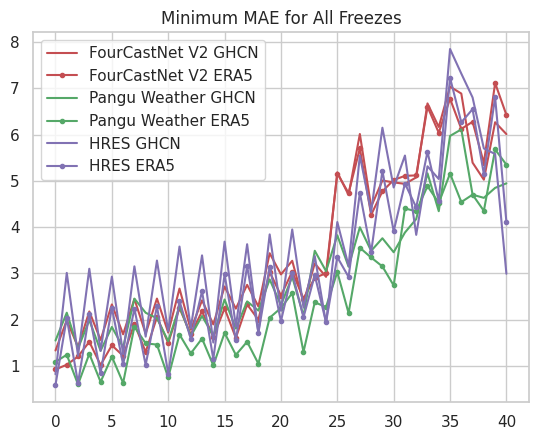

In [14]:
plt.plot(fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MinimumMAE']['value'].values, 'r', label='FourCastNet V2 GHCN')
plt.plot(fourv2_era5_group[fourv2_era5_group['metric'] == 'MinimumMAE']['value'].values, 'r.-', label='FourCastNet V2 ERA5')

# plt.plot(gc_ghcn_group[gc_ghcn_group['metric'] == 'MinimumMAE']['value'].values, 'b', label='GraphCast GHCN')
# plt.plot(gc_era5_group[gc_era5_group['metric'] == 'MinimumMAE']['value'].values, 'b.-', label='GraphCast ERA5')

plt.plot(pang_ghcn_group[pang_ghcn_group['metric'] == 'MinimumMAE']['value'].values, 'g', label='Pangu Weather GHCN')
plt.plot(pang_era5_group[pang_era5_group['metric'] == 'MinimumMAE']['value'].values, 'g.-', label='Pangu Weather ERA5')

plt.plot(hres_ghcn_group[hres_ghcn_group['metric'] == 'MinimumMAE']['value'].values, 'm', label='HRES GHCN')
plt.plot(hres_era5_group[hres_era5_group['metric'] == 'MinimumMAE']['value'].values, 'm.-', label='HRES ERA5')

plt.title('Minimum MAE for All Freezes')
plt.legend()

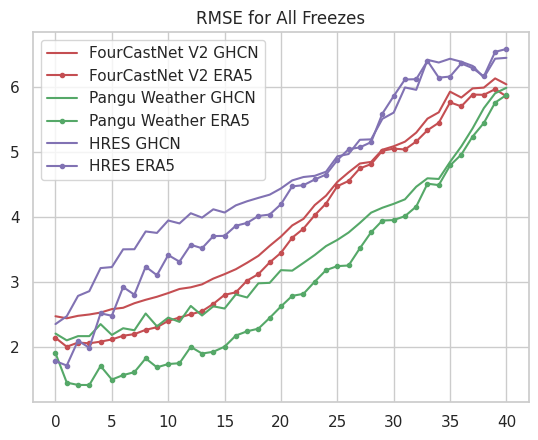

In [16]:
plt.plot(fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'RMSE']['value'].values, 'r', label='FourCastNet V2 GHCN')
plt.plot(fourv2_era5_group[fourv2_era5_group['metric'] == 'RMSE']['value'].values, 'r.-', label='FourCastNet V2 ERA5')

# plt.plot(gc_ghcn_group[gc_ghcn_group['metric'] == 'RMSE']['value'].values, 'b', label='GraphCast GHCN')
# plt.plot(gc_era5_group[gc_era5_group['metric'] == 'RMSE']['value'].values, 'b.-', label='GraphCast ERA5')

plt.plot(pang_ghcn_group[pang_ghcn_group['metric'] == 'RMSE']['value'].values, 'g', label='Pangu Weather GHCN')
plt.plot(pang_era5_group[pang_era5_group['metric'] == 'RMSE']['value'].values, 'g.-', label='Pangu Weather ERA5')

plt.plot(hres_ghcn_group[hres_ghcn_group['metric'] == 'RMSE']['value'].values, 'm', label='HRES GHCN')
plt.plot(hres_era5_group[hres_era5_group['metric'] == 'RMSE']['value'].values, 'm.-', label='HRES ERA5')

plt.title('RMSE for All Freezes')
plt.legend()